<a href="https://colab.research.google.com/github/Laura9704/ACD_2025/blob/main/Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer,f1_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#info del punto 2 clasificacion
data1 = pd.read_excel('/content/drive/MyDrive/BD_IPSA_1940.xlsx')

In [ ]:
data1

,Unnamed: 0,NOME,FAZ,TAL,tipocorte,variedad,madurada,producto,dosismad,semsmad,...,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
0,11,AMAIME SILCA,81291,40,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,8.3,...,4,12.7,2.4,14.0,12,202012,112,137,3,6.2
1,12,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.3,...,2,7.8,2.3,13.0,3,201903,157,0,3,3.5
2,13,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,7.9,...,3,8.8,1.8,13.3,3,202003,167,68,3,4.3
3,15,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.6,...,1,6.1,2.5,13.4,3,201903,156,0,3,3.5
4,16,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,8.1,...,2,7.9,2.1,14.0,3,202003,151,68,3,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,4216,ZABALETAS CORPORACION,80123,544B,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.3,5.6,...,3,8.5,1.8,13.5,3,201903,63,99,1,4.3
2183,4217,ZABALETAS CORPORACION,80123,545A,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.2,9.1,...,1,9.7,3.6,13.0,12,201912,126,448,1,3.1
2184,4218,ZABALETAS EMPRESA,82503,6,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.2,7.1,...,1,8.8,2.0,12.9,4,201904,173,122,1,2.2
2185,4219,ZABALETAS EMPRESA,82503,6,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.0,6.9,...,2,8.4,2.2,13.5,4,202004,134,73,1,3.1


#Transformacion de Sacarosa y TCH en Alto, Medio y Bajo, Variables Dependientes

In [12]:
y = data1[['sacarosa', 'TCH']]

In [13]:
bins = [y["TCH"].min() - 1, 130, 150, y["TCH"].max()]
labels = ['Bajo', 'Medio', 'Alto']
y['TCH_categoria'] = pd.cut(y['TCH'], bins=bins, labels=labels)

<ipython-input-13-b3ffe596746e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['TCH_categoria'] = pd.cut(y['TCH'], bins=bins, labels=labels)


In [14]:
y.describe()

,sacarosa,TCH
count,2187.000000,2187.000000
mean,12.777732,142.393233
std,0.854397,25.838029
min,9.200000,6.000000
25%,12.200000,126.000000
50%,12.800000,144.000000
75%,13.300000,159.000000
max,16.000000,249.000000


In [15]:
y['TCH_categoria'].value_counts()

,count
TCH_categoria,
Alto,839
Medio,684
Bajo,664


In [17]:
yc['Sacarosa_C'].value_counts()

,count
Sacarosa_C,
Alto,816
Medio,804
Bajo,567


In [16]:
bins2 = [y["sacarosa"].min() - 1, 12.2 ,13 , y["sacarosa"].max()]
y['Sacarosa_C'] = pd.cut(y['sacarosa'], bins=bins2, labels=labels)
yc=y[['TCH_categoria','Sacarosa_C']]

<ipython-input-16-11ada98b35ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Sacarosa_C'] = pd.cut(y['sacarosa'], bins=bins2, labels=labels)


#Analisis de las variables independientes

In [ ]:
data1.describe()

,Unnamed: 0,FAZ,dosismad,semsmad,edad,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,2126.506630,80588.332876,0.993278,9.164838,12.766118,2.794239,9.197759,4.172154,12.777732,6.758573,201887.691358,142.393233,118.051212,2.435299,4.317284
std,1228.561661,572.818299,0.309096,3.441579,1.117866,1.621195,1.574409,6.339255,0.854397,3.482444,131.982686,25.838029,144.424675,0.704058,2.591956
min,11.000000,80100.000000,0.000000,-1.600000,10.300000,1.000000,3.400000,0.200000,9.200000,1.000000,201407.000000,6.000000,0.000000,1.000000,0.200000
25%,1038.000000,80222.000000,0.800000,7.100000,12.000000,1.000000,8.200000,2.100000,12.200000,4.000000,201807.000000,126.000000,0.000000,2.000000,2.900000
50%,2219.000000,80396.000000,1.000000,8.700000,12.500000,2.000000,9.100000,2.600000,12.800000,7.000000,201908.000000,144.000000,77.000000,3.000000,3.700000
75%,3223.500000,80660.000000,1.200000,10.600000,13.300000,4.000000,10.100000,3.300000,13.300000,10.000000,202005.000000,159.000000,171.500000,3.000000,5.000000
max,4222.000000,82519.000000,9.000000,45.000000,21.100000,14.000000,15.000000,102.900000,16.000000,12.000000,202101.000000,249.000000,1468.000000,3.000000,25.500000


In [ ]:
data1.describe(include='object')

,NOME,TAL,tipocorte,variedad,madurada,producto
count,2187,2187,2187,2187,2187,2187
unique,285,273,1,1,1,1
top,SAN MIGUEL CARVAJAL,1,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO
freq,101,258,2187,2187,2187,2187


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2187 non-null   int64  
 1   NOME            2187 non-null   object 
 2   FAZ             2187 non-null   int64  
 3   TAL             2187 non-null   object 
 4   tipocorte       2187 non-null   object 
 5   variedad        2187 non-null   object 
 6   madurada        2187 non-null   object 
 7   producto        2187 non-null   object 
 8   dosismad        2187 non-null   float64
 9   semsmad         2187 non-null   float64
 10  edad            2187 non-null   float64
 11  cortes          2187 non-null   int64  
 12  me              2187 non-null   float64
 13  vejez           2187 non-null   float64
 14  sacarosa        2187 non-null   float64
 15  mes             2187 non-null   int64  
 16  periodo         2187 non-null   int64  
 17  TCH             2187 non-null   i

In [ ]:
X = data1.drop(columns=['sacarosa', 'TCH','tipocorte','variedad','madurada','producto','Unnamed: 0','NOME',	'FAZ','TAL','tipocorte'])


Se descartan las variables para el modelo porque...

- Se recomienda usar NOME solo para diferenciar las observaciones, reduce a 285 clases de identificación de la observación y . Si consideramos los 3 identificadores NOME_FAZ_TAL, tendriamos 1115 clases de identificación. Pero dada la cantidad de valores únicos que tiene NOME y los demás identificadores (FAZ y TAL), puede hacer más complejo y generar errores en el modelo. Además no hay una relación clara, ni se nota una diferencia drastica entre la unidad de análisis y TCH, preferible no incluir en el modelo
- Se descarta la variable desconocida, no se evidencia alguna relación con TCH
- Se descarta tipocorte porque no hay diferencia por tipo de corte, sólo hay un tipo
- Se descarta variedad porque sólo hay 1 tipo de variedad, no genera diferenciación
- Se descarta las variables que tiene una solo tipo de registro ya que su clasificacion es una solo,ademas se deberia suponer que no hay error en los datos cargados en los registos
- se entiende que no hay datos nulos,,en base a la informacion del dataset

In [ ]:
zero_counts = (X == 0).sum()
zero_counts

,0
dosismad,1
semsmad,0
edad,0
cortes,0
me,0
vejez,0
mes,0
periodo,0
lluvias,685
grupo_tenencia,0


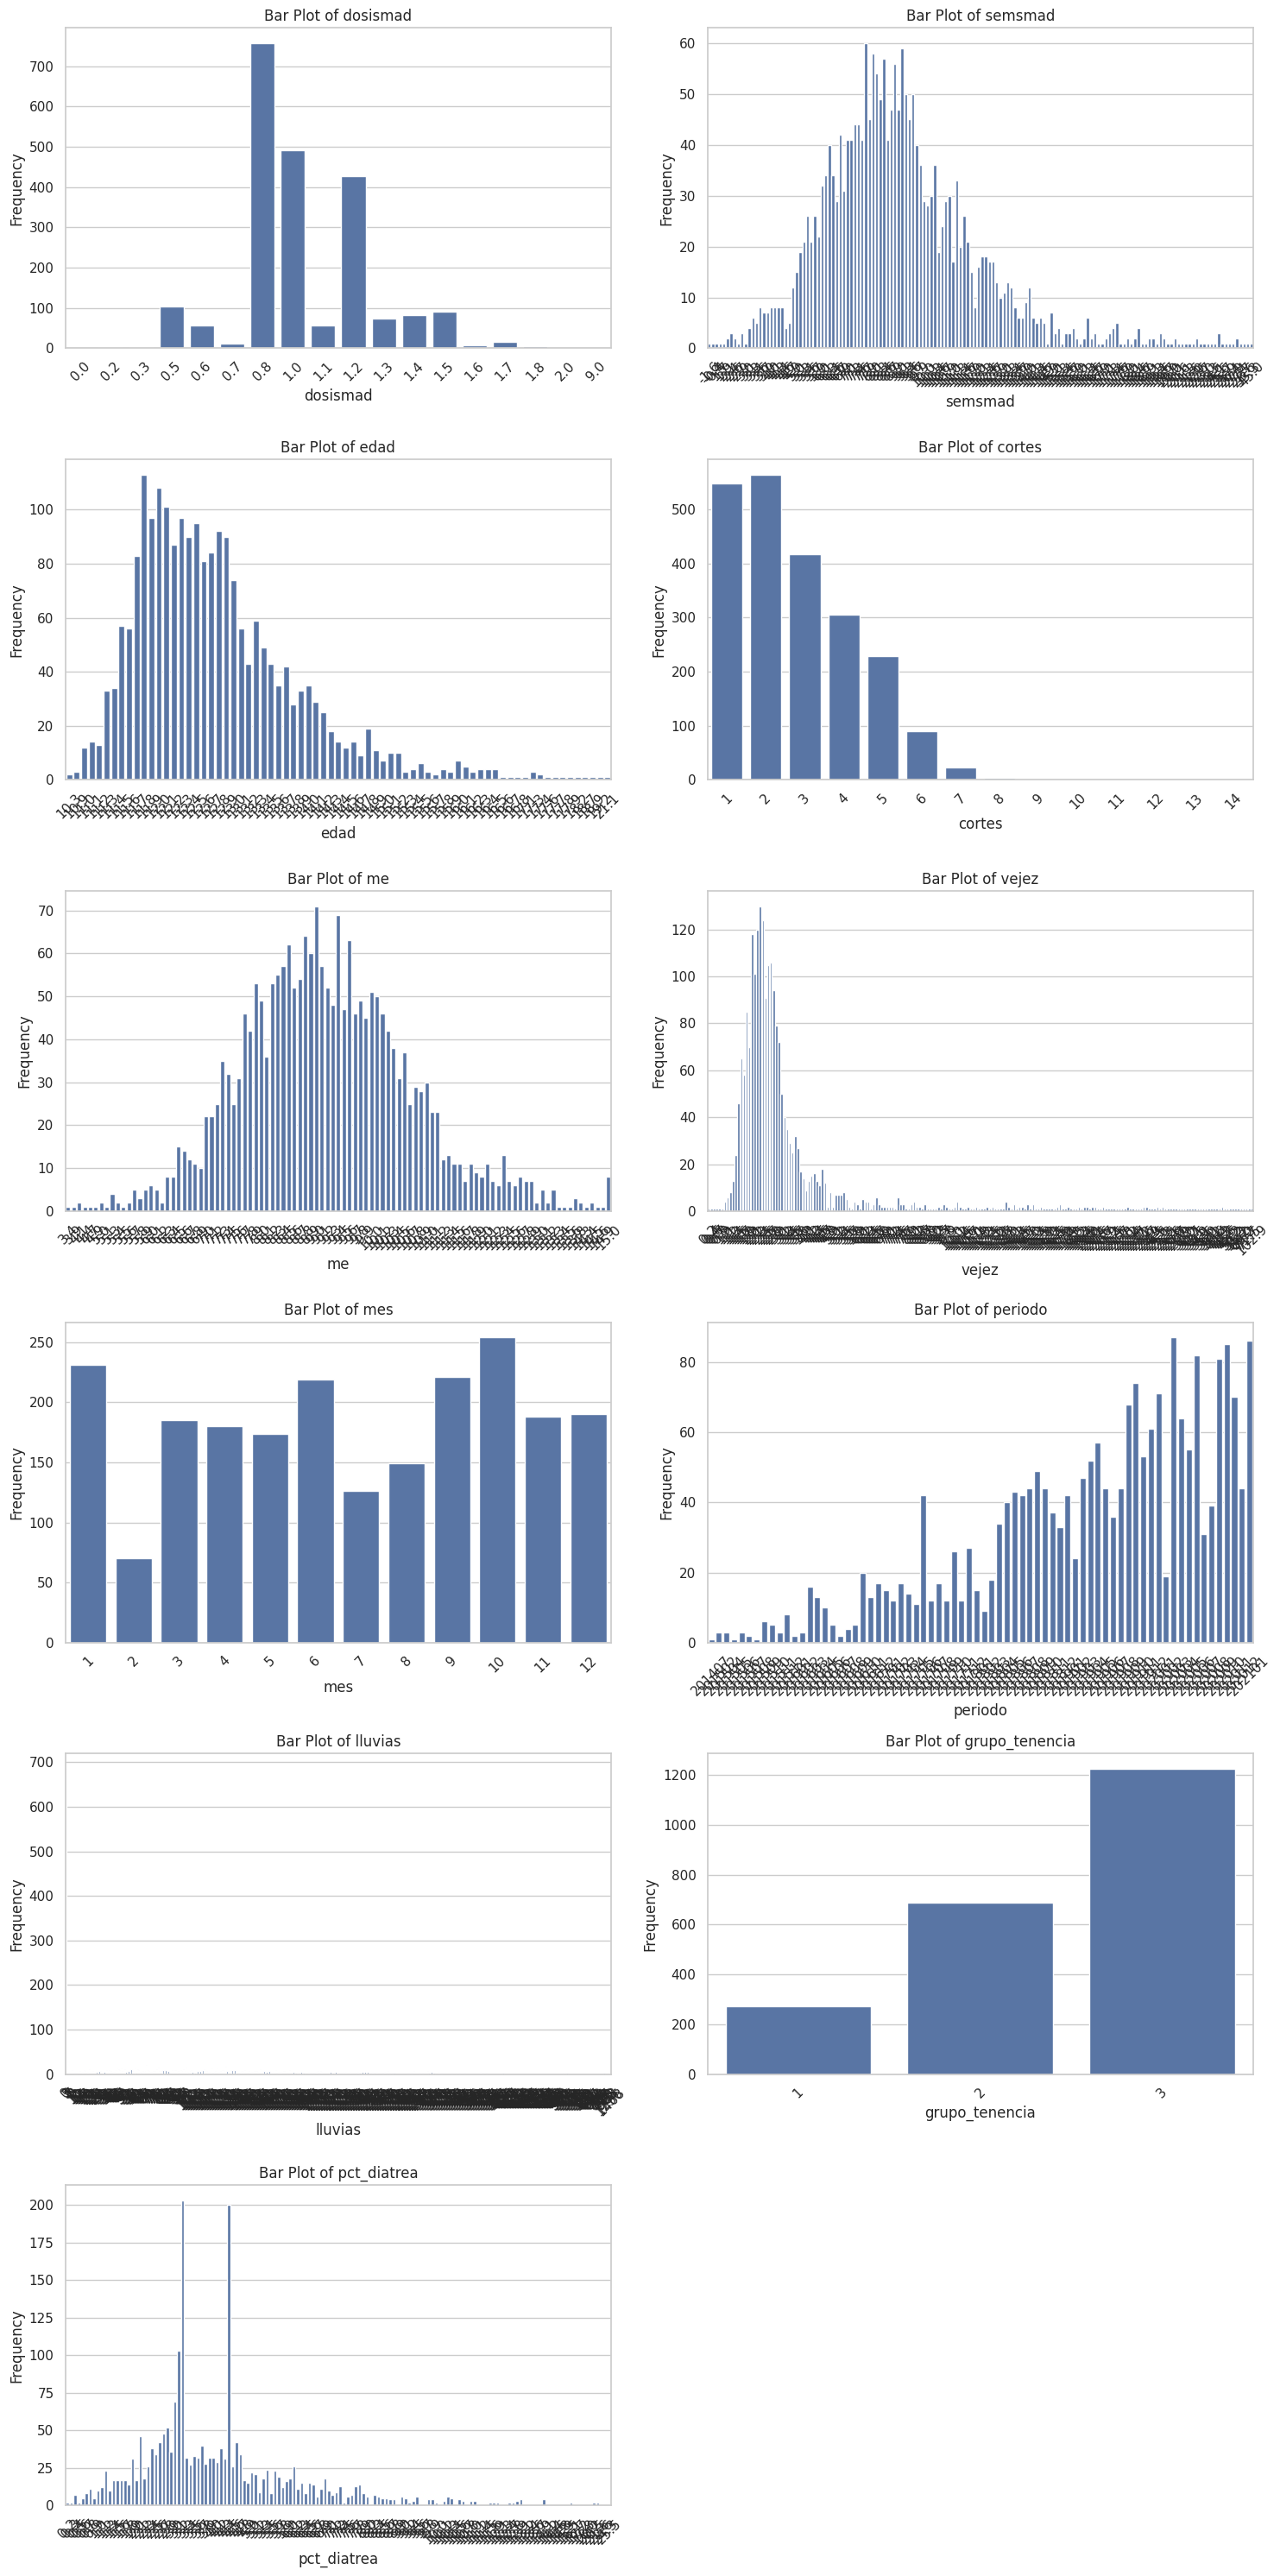

In [ ]:
numerical_features = X.select_dtypes(include=np.number).columns

# Calculate number of rows and columns for subplots
n_cols = 2
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical features and create bar plots
for i, col in enumerate(numerical_features):
    ax = axes[i]
    try:  # Handle potential errors during plotting
        sns.barplot(x=X[col].value_counts().index, y=X[col].value_counts().values, ax=ax)
        ax.set_title(f'Bar Plot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
    except Exception as e:
        print(f"Error plotting {col}: {e}")
        ax.set_title(f"Error plotting {col}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


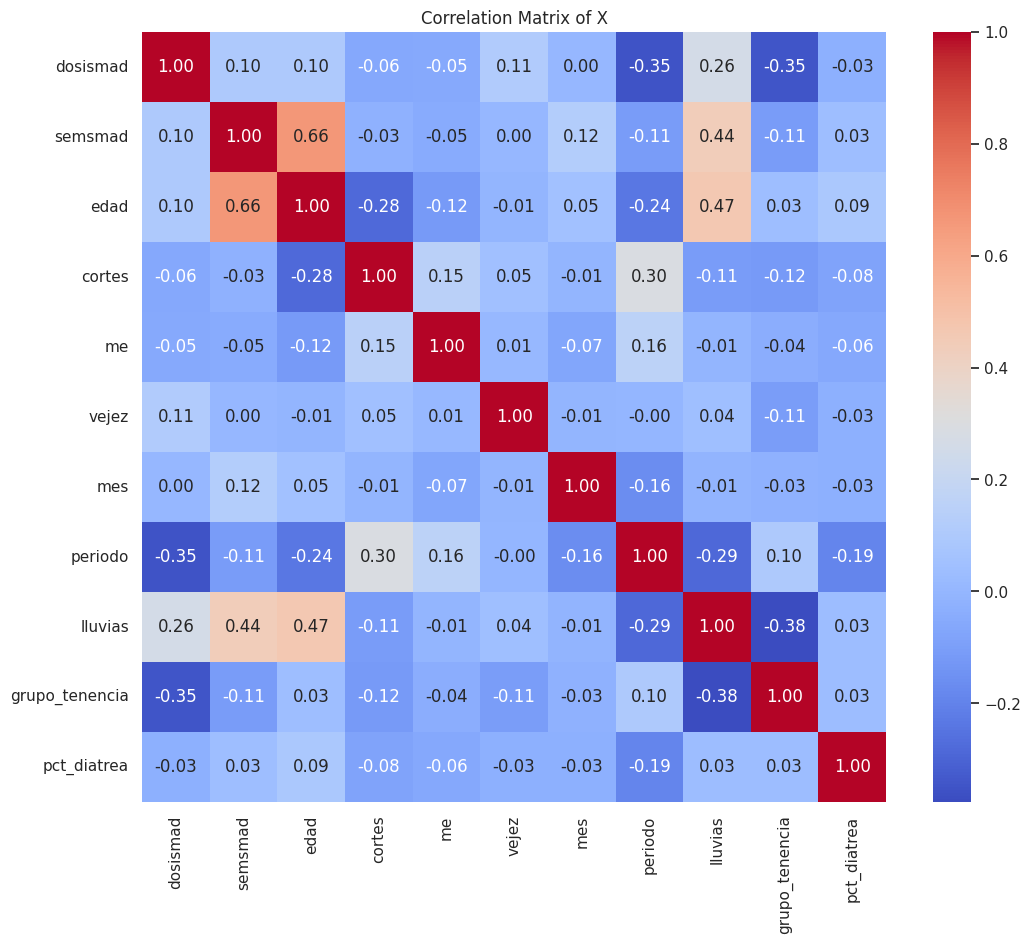

In [ ]:
# Calculate and plot the correlation matrix for X
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of X')
plt.show()


en base a los anteriores graficas se considera descarta a **me, mes y vejez** como variables no necesarias a implemnetar detro del modelo de clasificacion, ya que presenta una correlacion con las demas varianbles particamente nula.en caso de periodo tiene mas relevancia si en modelos que analsizen las tendencias temporales.


In [7]:
X= data1['año'] = data1['periodo'] // 100  # Extrae el año
X = data1.drop(columns=['sacarosa', 'TCH','tipocorte','variedad','madurada','producto','Unnamed: 0','NOME',	'FAZ','TAL','tipocorte','me','mes','periodo','vejez'])
# Separar la columna 'periodo' en 'año' y 'mes'


#Base procesada

In [8]:
X

,dosismad,semsmad,edad,cortes,lluvias,grupo_tenencia,pct_diatrea,año
0,0.8,8.3,12.3,4,137,3,6.2,2020
1,0.8,6.3,11.2,2,0,3,3.5,2019
2,0.6,7.9,12.2,3,68,3,4.3,2020
3,0.8,6.6,13.1,1,0,3,3.5,2019
4,0.6,8.1,12.2,2,68,3,4.3,2020
...,...,...,...,...,...,...,...,...
2182,1.3,5.6,11.5,3,99,1,4.3,2019
2183,1.2,9.1,13.3,1,448,1,3.1,2019
2184,1.2,7.1,12.6,1,122,1,2.2,2019
2185,1.0,6.9,12.0,2,73,1,3.1,2020


#Modelo(s) De Clasificacion

In [18]:
f1_scorer = make_scorer(f1_score, average='weighted')
#Se crean Grupo de Entrenamiento, validacion y Prueba
#Evalaucion Fianl
X_train, X_test, y_train, y_test = train_test_split(X, yc, test_size=0.3, random_state=42)
#Evaluacion Seleccion de Modelo
X_train2, X_value, y_train2, y_value = train_test_split(X_train,y_train, test_size=0.3, random_state=42)
# Scale the features
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train2)
X_values = scaler.transform(X_value)
#Grupo de Validacion Cruzada


##Regresion Logistica

In [19]:
model = LogisticRegression(solver='liblinear', random_state=0) # Example, adjust parameters
model.fit(X_trains, y_train2['Sacarosa_C'])
Y_pred=model.predict(X_values)
model2 = LogisticRegression(solver='liblinear', random_state=0) # Example, adjust parameters
model2.fit(X_trains, y_train2['TCH_categoria'])
Y_pred2=model2.predict(X_values)

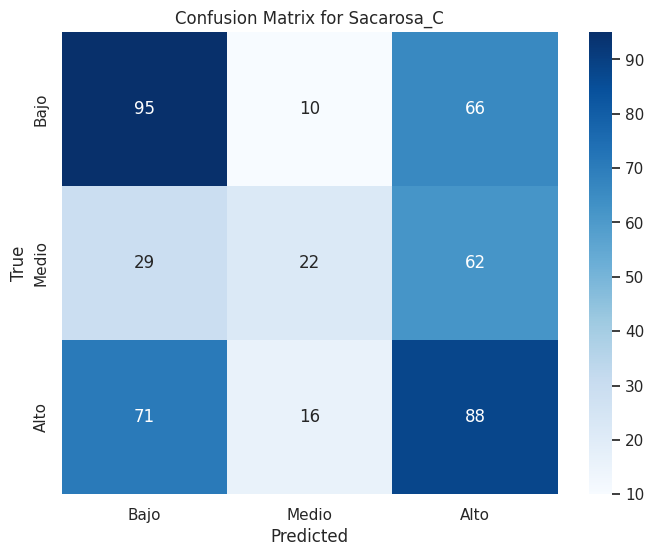

In [20]:
cm = confusion_matrix(y_value['Sacarosa_C'], Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Sacarosa_C')
plt.show()


In [21]:
# Evaluar el modelo
accuracy = accuracy_score(y_value['Sacarosa_C'], Y_pred)
report = classification_report(y_value['Sacarosa_C'], Y_pred)
# Mostrar resultados
print(f"Precisión del modelo: {accuracy:.4f}")
print("Reporte de clasificación:")
print(report)

Precisión del modelo: 0.4466
Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       0.49      0.56      0.52       171
        Bajo       0.46      0.19      0.27       113
       Medio       0.41      0.50      0.45       175

    accuracy                           0.45       459
   macro avg       0.45      0.42      0.41       459
weighted avg       0.45      0.45      0.43       459



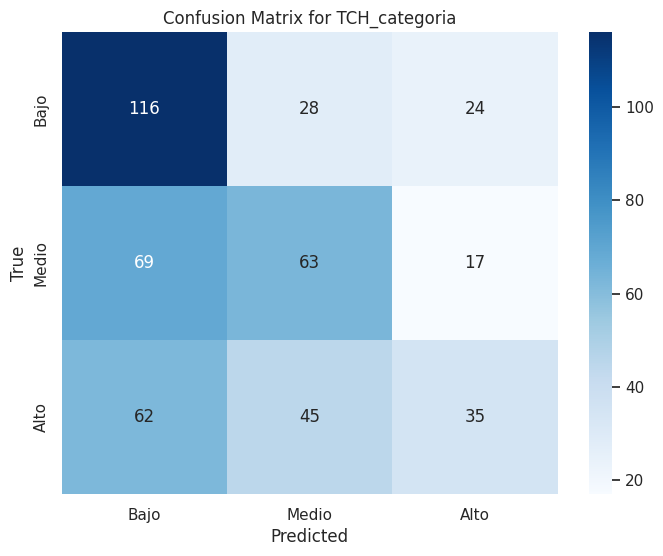

In [22]:
cm = confusion_matrix(y_value['TCH_categoria'], Y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TCH_categoria')
plt.show()

In [23]:
# Evaluar el modelo
accuracy2 = accuracy_score(y_value['TCH_categoria'], Y_pred2)
report2 = classification_report(y_value['TCH_categoria'], Y_pred2)
# Mostrar resultados
print(f"Precisión del modelo: {accuracy:.4f}")
print("Reporte de clasificación:")
print(report)

Precisión del modelo: 0.4466
Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       0.49      0.56      0.52       171
        Bajo       0.46      0.19      0.27       113
       Medio       0.41      0.50      0.45       175

    accuracy                           0.45       459
   macro avg       0.45      0.42      0.41       459
weighted avg       0.45      0.45      0.43       459



##Validacion Cruzada

In [ ]:
model3 = LogisticRegression(solver='liblinear', random_state=0) # Example, adjust parameters
model3.fit(X_train_fold, y_train_fold['Sacarosa_C'])
Y_pred3=model.predict(X_val_fold)
model4 = LogisticRegression(solver='liblinear', random_state=0) # Example, adjust parameters
model4.fit(X_train_fold, y_train_fold['TCH_categoria'])
Y_pred4=model2.predict(X_val_fold)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Evaluar el modelo
accuracy3 = accuracy_score(y_val_fold['Sacarosa_C'],Y_pred3)
report3 = classification_report(y_val_fold['Sacarosa_C'],Y_pred3)
accuracy4 = accuracy_score(y_val_fold['TCH_categoria'],Y_pred4)
report4 = classification_report(y_val_fold['TCH_categoria'], Y_pred4)
# Mostrar resultados
print(f"Precisión del modelo: {accuracy3:.4f}")
print("Reporte de clasificación:")
print(report3)
# Mostrar resultados
print(f"Precisión del modelo: {accuracy4:.4f}")
print("Reporte de clasificación:")
print(report4)

Precisión del modelo: 0.2570
Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       0.35      0.23      0.27        79
        Bajo       0.23      0.71      0.35        52
       Medio       0.00      0.00      0.00        83

    accuracy                           0.26       214
   macro avg       0.19      0.31      0.21       214
weighted avg       0.18      0.26      0.19       214

Precisión del modelo: 0.3879
Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       0.38      0.96      0.55        81
        Bajo       0.56      0.08      0.14        62
       Medio       0.00      0.00      0.00        71

    accuracy                           0.39       214
   macro avg       0.31      0.35      0.23       214
weighted avg       0.30      0.39      0.25       214



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

##Modelo KNN

KNN Model - Sacarosa_C
Accuracy: 0.46187363834422657
Classification Report:
              precision    recall  f1-score   support

        Alto       0.50      0.68      0.57       171
        Bajo       0.39      0.31      0.34       113
       Medio       0.45      0.35      0.39       175

    accuracy                           0.46       459
   macro avg       0.45      0.45      0.44       459
weighted avg       0.45      0.46      0.45       459



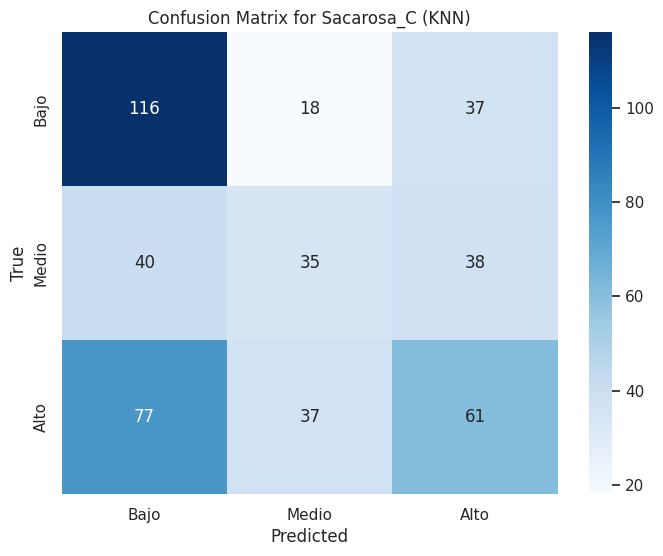


KNN Model - TCH_categoria
Accuracy: 0.46405228758169936
Classification Report:
              precision    recall  f1-score   support

        Alto       0.51      0.66      0.58       168
        Bajo       0.46      0.40      0.42       149
       Medio       0.38      0.30      0.34       142

    accuracy                           0.46       459
   macro avg       0.45      0.45      0.45       459
weighted avg       0.45      0.46      0.45       459



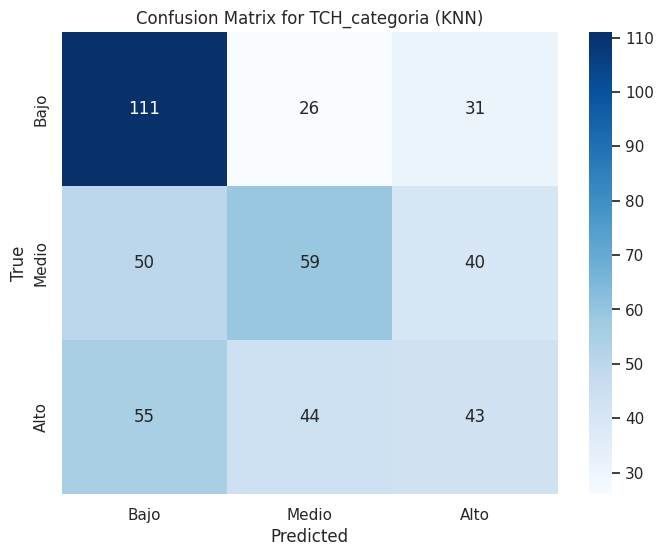


KNN Cross-Validation Scores (Sacarosa_C): [nan nan nan nan nan]
Mean KNN CV Score (Sacarosa_C): nan

KNN Cross-Validation Scores (TCH_categoria): [nan nan nan nan nan]
Mean KNN CV Score (TCH_categoria): nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Alto' 'Bajo' 'Medio']

  warnings.warn(
/usr/local/lib/python3.11/dist-packag

In [24]:
# Define the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors

# Train the model for Sacarosa_C
knn_model.fit(X_trains, y_train2['Sacarosa_C'])
knn_pred = knn_model.predict(X_values)

# Evaluate the model for Sacarosa_C
knn_accuracy = accuracy_score(y_value['Sacarosa_C'], knn_pred)
knn_report = classification_report(y_value['Sacarosa_C'], knn_pred)
print("KNN Model - Sacarosa_C")
print(f"Accuracy: {knn_accuracy}")
print(f"Classification Report:\n{knn_report}")

# Confusion Matrix for Sacarosa_C
cm_knn = confusion_matrix(y_value['Sacarosa_C'], knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Sacarosa_C (KNN)')
plt.show()

# Train the model for TCH_categoria
knn_model.fit(X_trains, y_train2['TCH_categoria'])
knn_pred2 = knn_model.predict(X_values)

# Evaluate the model for TCH_categoria
knn_accuracy2 = accuracy_score(y_value['TCH_categoria'], knn_pred2)
knn_report2 = classification_report(y_value['TCH_categoria'], knn_pred2)
print("\nKNN Model - TCH_categoria")
print(f"Accuracy: {knn_accuracy2}")
print(f"Classification Report:\n{knn_report2}")

# Confusion Matrix for TCH_categoria
cm_knn2 = confusion_matrix(y_value['TCH_categoria'], knn_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TCH_categoria (KNN)')
plt.show()

#Perform Cross-Validation for KNN (Example with StratifiedKFold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Example 5-fold CV
knn_cv_scores = cross_val_score(knn_model, X_trains, y_train2['Sacarosa_C'], cv=skf, scoring=f1_scorer)
print(f"\nKNN Cross-Validation Scores (Sacarosa_C): {knn_cv_scores}")
print(f"Mean KNN CV Score (Sacarosa_C): {knn_cv_scores.mean()}")

knn_cv_scores2 = cross_val_score(knn_model, X_trains, y_train2['TCH_categoria'], cv=skf, scoring=f1_scorer)
print(f"\nKNN Cross-Validation Scores (TCH_categoria): {knn_cv_scores2}")
print(f"Mean KNN CV Score (TCH_categoria): {knn_cv_scores2.mean()}")
